In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats

columns_to_sum = ['Iron', 'Al','Fe','Silicon','Aluminum','Calcium','Manganese','Mn','Potassium','K','Ca','Si']

OM;   EC;   NO3-;    SO4-;   NH4+;     Cl-;    mineral dust(MD)

Unaccounted: the difference between the PM2.5 gravimetric mass and the sum of the PM constituents (OM, EC, SO2− 4 , NO− 3 , NH+ 4 , Mineral dust and Cl−)

In [189]:
speciesDG = pd.read_excel('speciesDG.xlsx')

In [2]:
speciesNS = pd.read_excel('speciesNS.xlsx')
speciesGZ = pd.read_excel('speciesGZ.xlsx')
speciesNH = pd.read_excel('speciesNH.xlsx')
speciesDG = pd.read_excel('speciesDG.xlsx')

In [ ]:
# DG 200807 - 201411

In [3]:
speciesNH.head()

,Unnamed: 0,date,date.1,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,...,Manganese,Iron,Al,Si,Mn,Fe,PM2.5,Na,MD,species
0,0,0,2008-01-01,115.400767,11.038004,2.051079,7.265366,14.071695,18.984675,28.072316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,115.271432
1,1,1,2008-02-01,66.728548,7.503313,1.250673,5.199129,9.544714,13.333987,11.750027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,63.422097
2,2,2,2008-03-01,160.084552,16.518590,2.591981,6.845976,26.435403,30.129067,35.722674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,161.161326
3,3,3,2008-04-01,80.840850,9.543879,1.509100,3.955229,9.085568,19.492765,14.764564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,77.472241
4,4,4,2008-05-01,86.767778,11.217818,1.551281,3.288739,12.486296,21.310384,13.747099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,81.123310


Text(0, 0.5, 'concentration (ug/m₃)')

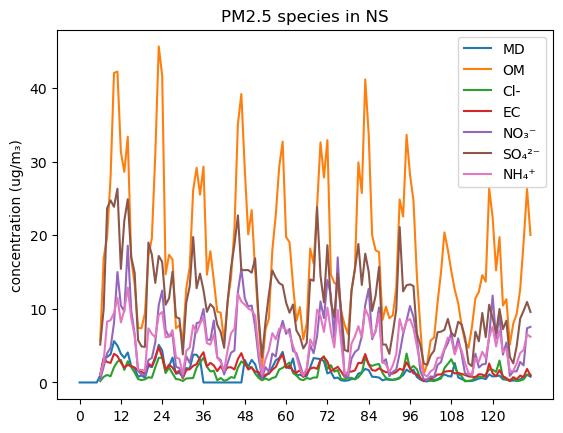

In [4]:
plt.plot(speciesNS.index, speciesNS['MD'], label='MD')
plt.plot(speciesNS.index, speciesNS['OM'].replace(0,np.nan), label='OM')
plt.plot(speciesNS['Cl-'],label='Cl-')
plt.plot(speciesNS['EC_TOT'],label= 'EC')
plt.plot(speciesNS['NO3-'], label='NO\u2083\u207B')
plt.plot(speciesNS['SO4='], label='SO\u2084\u00B2\u207B')
plt.plot(speciesNS['NH4+'],label='NH\u2084\u207A')
plt.xticks(range(0, len(speciesNS.index), 12), speciesNS.index[::12])

plt.title('PM2.5 species in NS')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

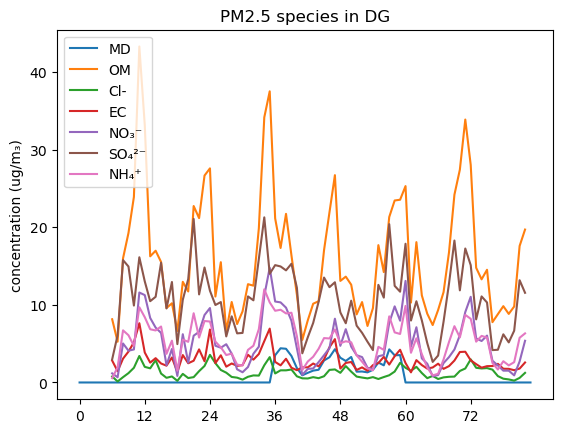

In [5]:
plt.plot(speciesDG.index, speciesDG['MD'], label='MD')
plt.plot(speciesDG.index, speciesDG['OM'].replace(0,np.nan), label='OM')
plt.plot(speciesDG['Cl-'],label='Cl-')
plt.plot(speciesDG['EC_TOT'],label= 'EC')
plt.plot(speciesDG['NO3-'], label='NO\u2083\u207B')
plt.plot(speciesDG['SO4='], label='SO\u2084\u00B2\u207B')
plt.plot(speciesDG['NH4+'],label='NH\u2084\u207A')
plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

plt.title('PM2.5 species in DG')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

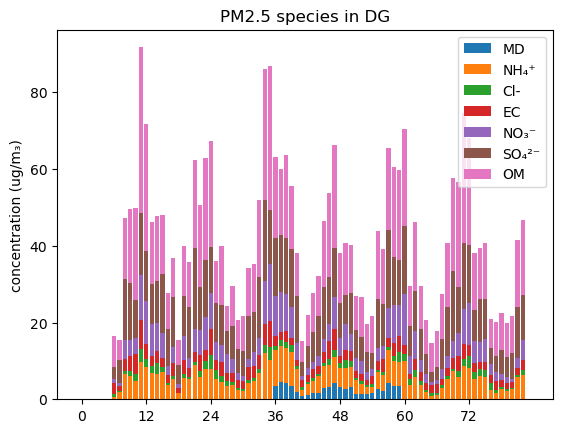

In [6]:
plt.bar(speciesDG.index, speciesDG['MD'], label='MD')
plt.bar(speciesDG.index, speciesDG['NH4+'], bottom=speciesDG['MD'], label='NH\u2084\u207A')
plt.bar(speciesDG.index, speciesDG['Cl-'],  bottom=speciesDG['MD']+  speciesDG['NH4+'], label='Cl-')
plt.bar(speciesDG.index, speciesDG['EC_TOT'], bottom=speciesDG['MD']+speciesDG['NH4+']+speciesDG['Cl-'], label='EC')
plt.bar(speciesDG.index, speciesDG['NO3-'],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesDG.index, speciesDG['SO4='],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT']+speciesDG['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesDG.index, speciesDG['OM'], bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+ speciesDG['EC_TOT'] + speciesDG['NO3-']+speciesDG['SO4='], label='OM')

plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

plt.title('PM2.5 species in DG')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

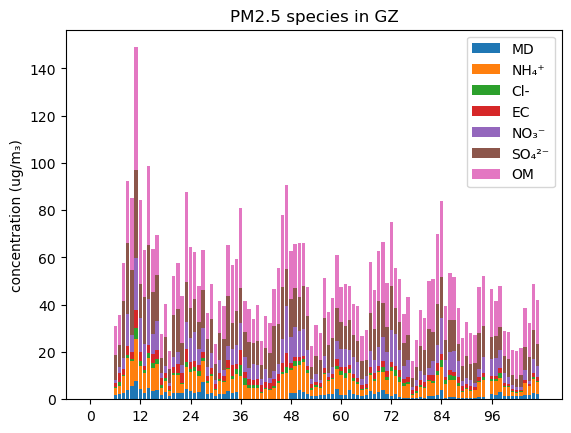

In [7]:
plt.bar(speciesGZ.index, speciesGZ['MD'], label='MD')
plt.bar(speciesGZ.index, speciesGZ['NH4+'], bottom=speciesGZ['MD'], label='NH\u2084\u207A')
plt.bar(speciesGZ.index, speciesGZ['Cl-'], bottom=speciesGZ['MD']+speciesGZ['NH4+'], label='Cl-')
plt.bar(speciesGZ.index, speciesGZ['EC_TOT'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-'], label='EC')
plt.bar(speciesGZ.index, speciesGZ['NO3-'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesGZ.index, speciesGZ['SO4='], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT']+speciesGZ['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesGZ.index, speciesGZ['OM'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT']+speciesGZ['NO3-']+speciesGZ['SO4='], label='OM')

plt.xticks(range(0, len(speciesGZ.index), 12), speciesGZ.index[::12])

plt.title('PM2.5 species in GZ')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

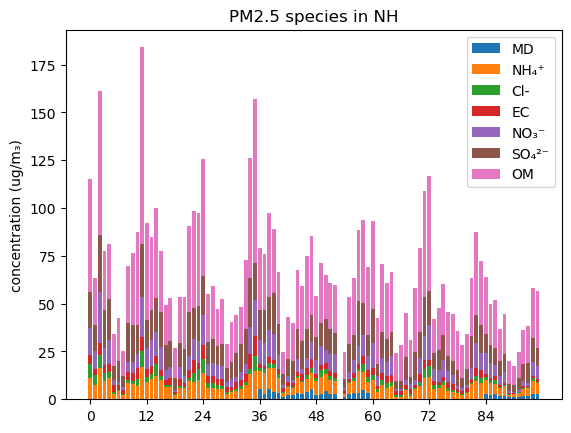

In [8]:
plt.bar(speciesNH.index, speciesNH['MD'], label='MD')
plt.bar(speciesNH.index, speciesNH['NH4+'], bottom=speciesNH['MD'], label='NH\u2084\u207A')
plt.bar(speciesNH.index, speciesNH['Cl-'],  bottom=speciesNH['MD']+  speciesNH['NH4+'], label='Cl-')
plt.bar(speciesNH.index, speciesNH['EC_TOT'], bottom=speciesNH['MD']+speciesNH['NH4+']+speciesNH['Cl-'], label='EC')
plt.bar(speciesNH.index, speciesNH['NO3-'],  bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+speciesNH['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesNH.index, speciesNH['SO4='],  bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+speciesNH['EC_TOT']+speciesNH['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesNH.index, speciesNH['OM'], bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+ speciesNH['EC_TOT'] + speciesNH['NO3-']+speciesNH['SO4='], label='OM')

plt.xticks(range(0, len(speciesNH.index), 12), speciesNH.index[::12])

plt.title('PM2.5 species in NH')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

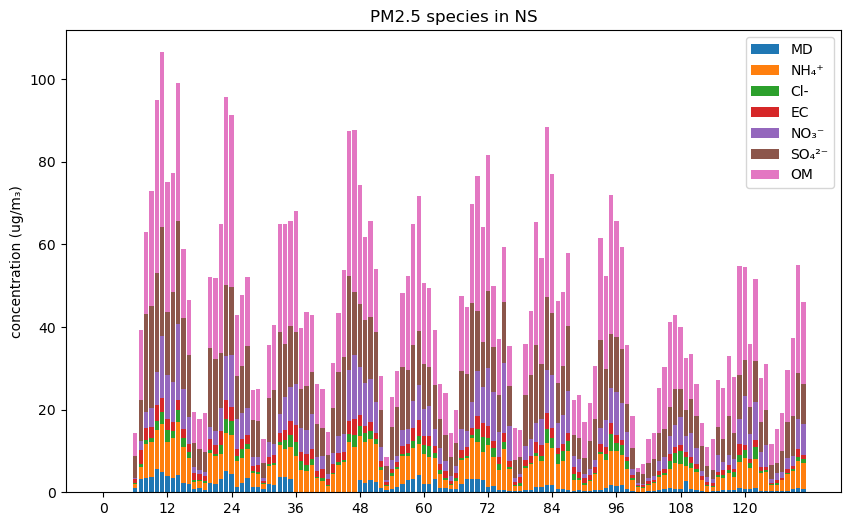

In [9]:
plt.figure(figsize=(10,6))

plt.bar(speciesNS.index, speciesNS['MD'], label='MD')
plt.bar(speciesNS.index, speciesNS['NH4+'], bottom=speciesNS['MD'], label='NH\u2084\u207A')
plt.bar(speciesNS.index, speciesNS['Cl-'],  bottom=speciesNS['MD']+  speciesNS['NH4+'], label='Cl-')
plt.bar(speciesNS.index, speciesNS['EC_TOT'], bottom=speciesNS['MD']+speciesNS['NH4+']+speciesNS['Cl-'], label='EC')
plt.bar(speciesNS.index, speciesNS['NO3-'],  bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+speciesNS['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesNS.index, speciesNS['SO4='],  bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+speciesNS['EC_TOT']+speciesNS['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesNS.index, speciesNS['OM'], bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+ speciesNS['EC_TOT'] + speciesNS['NO3-']+speciesNS['SO4='], label='OM')

plt.xticks(range(0, len(speciesNS.index), 12), speciesNS.iloc[:,0][::12])

plt.title('PM2.5 species in NS')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [10]:
speciesNS.iloc[:,0][::12]

0        0
12      12
24      24
36      36
48      48
60      60
72      72
84      84
96      96
108    108
120    120
Name: Unnamed: 0, dtype: int64

In [11]:
# speciesNH['OM'][3] = speciesNH['OC_TOT'][3]*1.4
# speciesNH['OM'][3]
# #speciesNH['OC_TOT'][3]

In [12]:
type(speciesNH['OM'][4])

numpy.float64

In [13]:
type(np.nan)

float

In [14]:
nan_float64 = np.float64('nan')

# Check the type of the new numpy.float64 NaN object
nan_float64_type = type(nan_float64)
print("Type of nan_float64:", nan_float64_type)

Type of nan_float64: <class 'numpy.float64'>


In [15]:
type(nan_float64)

numpy.float64

Sum up the species and compare with the total PM2.5 measured  
find the OM/OC ratio (1.4 , 1.6 , 1.8 , 2.1 ?)

OM;   EC;   NO3-;    SO4-;   NH4+;     Cl-;    mineral dust(MD)

Unaccounted: the difference between the PM2.5 gravimetric mass and the sum of the PM constituents (OM, EC, SO2− 4 , NO− 3 , NH+ 4 , Mineral dust and Cl−)

In [16]:
speciesNH.columns

Index(['Unnamed: 0', 'date', 'date.1', 'Teflon Mass', 'NH4+', 'K+', 'Cl-',
       'NO3-', 'SO4=', 'OC_TOT', 'EC_TOT', 'K', 'Ca', 'OM', 'Aluminum',
       'Silicon', 'Sulfur', 'Chlorine', 'Potassium', 'Calcium', 'Manganese',
       'Iron', 'Al', 'Si', 'Mn', 'Fe', 'PM2.5', 'Na', 'MD', 'species'],
      dtype='object')

In [17]:
to_sum = ['NH4+','Cl-','NO3-', 'SO4=','OC_TOT', 'EC_TOT','MD']

In [18]:
speciesNH['species'] = speciesNH[to_sum].sum(axis=1)

In [19]:
# NH is missing data for 201206

NH = speciesNH.dropna(subset=['Teflon Mass'])

In [20]:
# for i in range(len(speciesNH)):
#     if pd.isnull(speciesNH['OM'][i]):
#         print('Null')
#     else:
#         print(speciesNH['OM'][i])     
##  index 24-35 is not null

In [21]:
for i in range(len(speciesNH)):
    if pd.isnull(speciesNH['Teflon Mass'][i]):
        speciesNH.loc[i, 'Teflon Mass'] = speciesNH['PM2.5'][i] 

In [22]:
x = range(0,175)

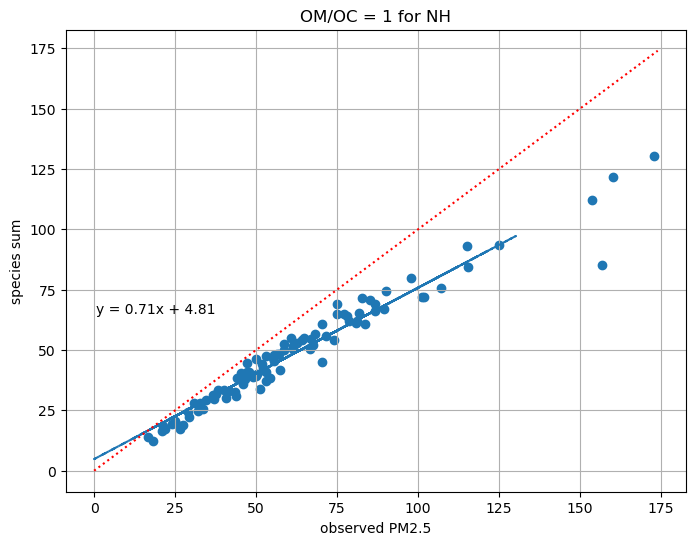

r-squared:  0.9518652104285069


In [23]:
'''missing data for 201206 NH'''
# sum includes OC but no OM

# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNH['Teflon Mass'], speciesNH['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1 for NH')
plt.grid(True)

# Fit a linear regression model
y = NH['species'].values
X = NH['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNH['species'], slope * speciesNH['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation) #, color='red')

x = range(0,175)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

print('r-squared: ',model.score(X,y))

In [24]:
speciesNH.iloc[52:55,:]

,Unnamed: 0,date,date.1,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,...,Manganese,Iron,Al,Si,Mn,Fe,PM2.5,Na,MD,species
52,52,52,2012-05-01,50.017718,6.986746,0.985389,1.833123,9.878692,10.905804,11.956881,...,NaN,NaN,0.354912,0.636683,0.045623,0.41911,NaN,NaN,2.533744,46.416857
53,53,53,2012-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
54,54,54,2012-07-01,26.649326,1.319796,0.340721,0.368947,1.156749,4.582079,6.854208,...,NaN,NaN,0.203767,0.331678,0.022362,0.21319,NaN,NaN,1.316104,17.284078


In [25]:
# use OM/OC = 1.4

for i in range(len(speciesNH)):
    speciesNH.loc[i, 'OM'] = speciesNH['OC_TOT'][i] * 1.4

In [26]:
speciesNH['species'] = speciesNH[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

In [27]:
# NH is missing data for 201206

NH = speciesNH.dropna(subset=['Teflon Mass'])

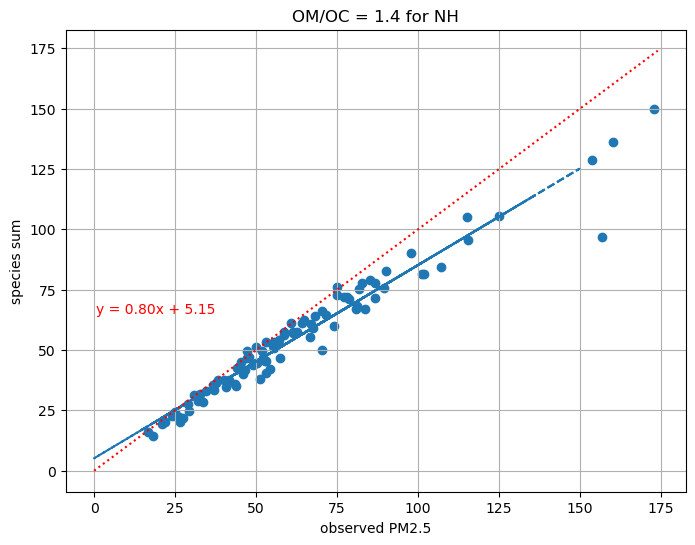

In [28]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNH['Teflon Mass'], speciesNH['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.4 for NH')
plt.grid(True)

# Fit a linear regression model
y = NH['species'].values
X = NH['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNH['species'], slope * speciesNH['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,175)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

In [29]:
for i in range(len(speciesNH)):
    speciesNH.loc[i, 'OM'] = speciesNH['OC_TOT'][i] * 2.1

speciesNH['species'] = speciesNH[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

# NH is missing data for 201206

NH = speciesNH.dropna(subset=['Teflon Mass'])

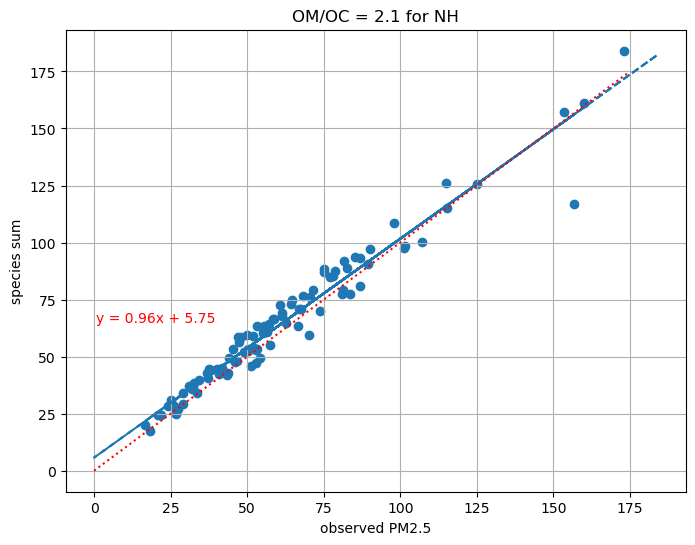

In [30]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNH['Teflon Mass'], speciesNH['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 2.1 for NH')
plt.grid(True)

# Fit a linear regression model
y = NH['species'].values
X = NH['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNH['species'], slope * speciesNH['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,175)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

In [31]:
speciesNS.columns

Index(['Unnamed: 0', 'date', 'date.1', 'Teflon Mass', 'NH4+', 'K+', 'Cl-',
       'NO3-', 'SO4=', 'OC_TOT', 'EC_TOT', 'Aluminum', 'Silicon', 'Sulfur',
       'Chlorine', 'Potassium', 'Calcium', 'Manganese', 'Iron',
       'Trace_elements', 'K', 'Ca', 'OM', 'Al', 'Si', 'Mn', 'Fe', 'PM2.5',
       'S/SO4', 'MD', 'species'],
      dtype='object')

In [32]:
for i in range(len(speciesNS)):
    if pd.isnull(speciesNS['Teflon Mass'][i]):
        speciesNS.loc[i, 'Teflon Mass'] = speciesNS['PM2.5'][i] 

In [33]:
# for i in range(len(speciesNHS)):
#     speciesNS.loc[i, 'OM'] = speciesNS['OC_TOT'][i] * 2.1

speciesNS['species'] = speciesNS[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OC_TOT', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

NS = speciesNS.dropna(subset=['Teflon Mass'])

In [34]:
speciesNS['Teflon Mass'].max()

105.198952977622

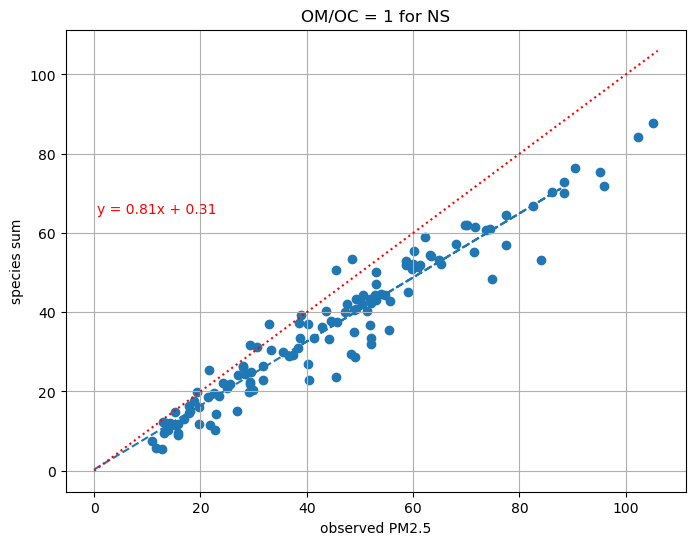

In [35]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNS['Teflon Mass'], speciesNS['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1 for NS')
plt.grid(True)

# Fit a linear regression model
y = NS['species'].values
X = NS['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNS['species'], slope * speciesNS['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,107)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

In [36]:
for i in range(len(speciesNS)):
    speciesNS.loc[i, 'OM'] = speciesNS['OC_TOT'][i] * 1.4

speciesNS['species'] = speciesNS[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

NS = speciesNS.dropna(subset=['Teflon Mass'])

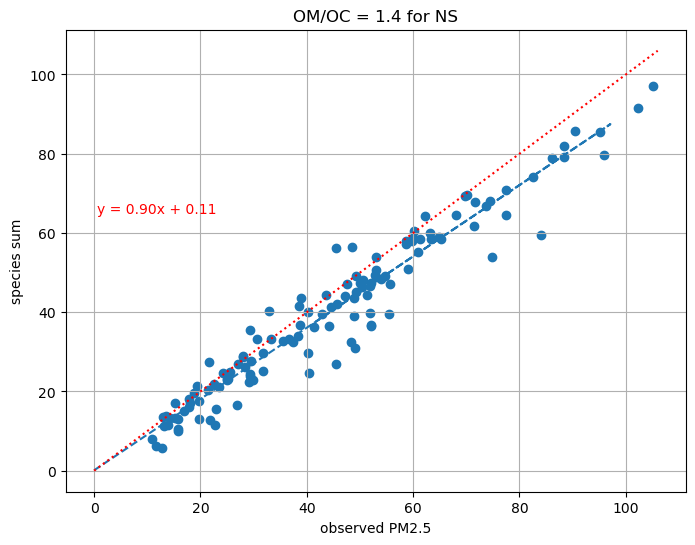

r-squared:  0.9373915919170935


In [37]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNS['Teflon Mass'], speciesNS['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.4 for NS')
plt.grid(True)

# Fit a linear regression model
y = NS['species'].values
X = NS['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNS['species'], slope * speciesNS['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,107)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

print('r-squared: ',model.score(X,y))

In [38]:
for i in range(len(speciesNS)):
    speciesNS.loc[i, 'OM'] = speciesNS['OC_TOT'][i] * 1.8

speciesNS['species'] = speciesNS[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

NS = speciesNS.dropna(subset=['Teflon Mass'])

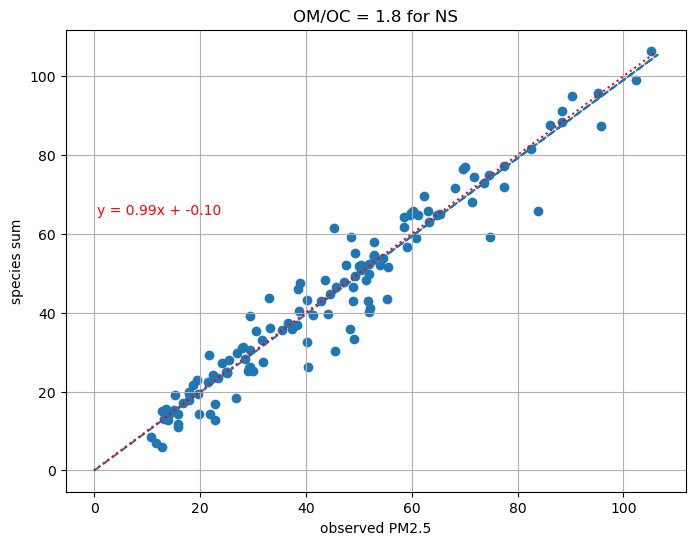

r-squared:  0.9389578238860501


In [39]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNS['Teflon Mass'], speciesNS['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.8 for NS')
plt.grid(True)

# Fit a linear regression model
y = NS['species'].values
X = NS['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNS['species'], slope * speciesNS['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,107)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

print('r-squared: ',model.score(X,y))

In [40]:
speciesGZ['Teflon Mass'].max()

158.372016439596

In [41]:
# import statsmodels.api as sm

# # Assuming you have already fitted your linear regression model and have X, y defined

# # Add a constant term to the independent variable
# X = sm.add_constant(X)

# # Fit the OLS (Ordinary Least Squares) model
# model = sm.OLS(y, X).fit()

# # Get the p-values of the coefficients
# p_values = model.pvalues

# # Print the p-values
# print(p_values)

In [42]:
# for i in range(len(speciesGZ)):
#     speciesGZ.loc[i, 'OM'] = speciesGZ['OC_TOT'][i] * 1.8

speciesGZ['species'] = speciesGZ[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OC_TOT', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

GZ = speciesGZ.dropna(subset=['Teflon Mass'])

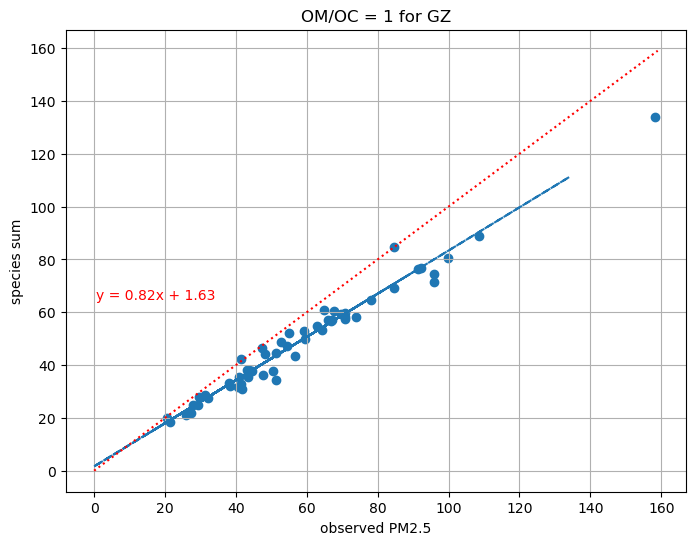

r-squared:  0.9678198781683673


In [43]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesGZ['Teflon Mass'], speciesGZ['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1 for GZ')
plt.grid(True)

# Fit a linear regression model
y = GZ['species'].values
X = GZ['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesGZ['species'], slope * speciesGZ['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,160)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

print('r-squared: ',model.score(X,y))

In [44]:
for i in range(len(speciesGZ)):
    #speciesGZ.loc[i, 'OM'] = speciesGZ['OC_TOT'][i] * 1.8
    speciesGZ.loc[i, 'OM'] = speciesGZ['OC_TOT'][i] * 1.4

speciesGZ['species'] = speciesGZ[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

GZ = speciesGZ.dropna(subset=['Teflon Mass'])

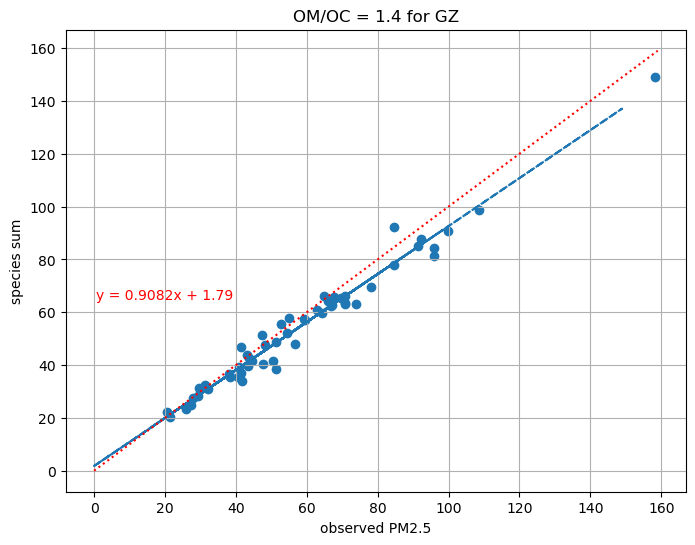

r-squared:  0.9710372981481367


In [45]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesGZ['Teflon Mass'], speciesGZ['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.4 for GZ')
plt.grid(True)

# Fit a linear regression model
y = GZ['species'].values
X = GZ['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesGZ['species'], slope * speciesGZ['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.4f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,160)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

print('r-squared: ',model.score(X,y))

In [46]:
speciesDG['Teflon Mass'].max()

107.4072492618508

In [190]:
# for i in range(len(speciesDG)):
#     speciesDG.loc[i, 'OM'] = speciesDG['OC_TOT'][i] * 1.8

speciesDG['species'] = speciesDG[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OC_TOT', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

DG = speciesDG.dropna(subset=['Teflon Mass'])

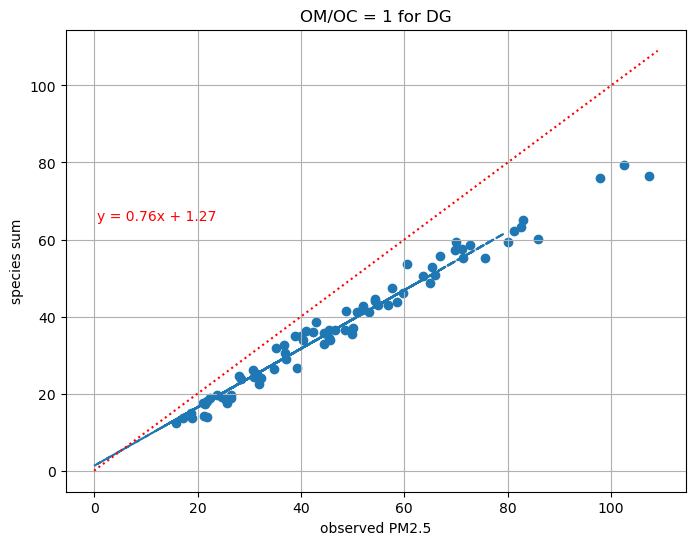

In [191]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesDG['Teflon Mass'], speciesDG['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1 for DG')
plt.grid(True)

# Fit a linear regression model
y = DG['species'].values
X = DG['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesDG['species'], slope * speciesDG['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,110)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

#print('r-squared: ',model.score(X,y))

In [194]:
for i in range(len(speciesDG)):
    #speciesDG.loc[i, 'OM'] = speciesDG['OC_TOT'][i] * 1.9
    speciesDG.loc[i, 'OM'] = speciesDG['OC_TOT'][i] * 1.4

speciesDG['species'] = speciesDG[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

DG = speciesDG.dropna(subset=['Teflon Mass'])

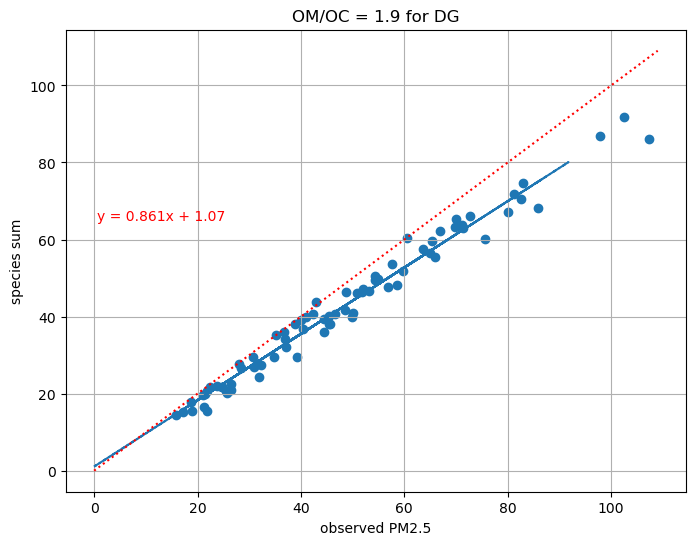

In [193]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesDG['Teflon Mass'], speciesDG['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.9 for DG')
plt.grid(True)

# Fit a linear regression model
y = DG['species'].values
X = DG['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesDG['species'], slope * speciesDG['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.3f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,110)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

#print('r-squared: ',model.score(X,y))

In [51]:
slope

0.8579872689030866

In [52]:
residual = speciesDG['species'] - speciesDG['Teflon Mass']
#speciesDG['Unnamed: 0']
print(len(speciesDG.iloc[:,0]), len(residual))

84 84


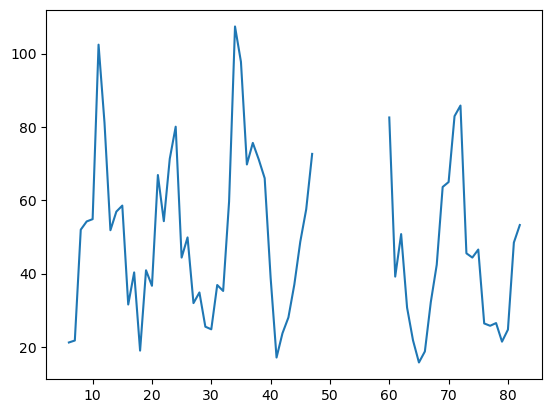

In [53]:
plt.plot(speciesDG['Teflon Mass'])

In [196]:
# reanme the column to 'date'

speciesDG = speciesDG.rename(columns={'Unnamed: 0': 'date'})
# speciesGZ = speciesGZ.rename(columns={'Unnamed: 0': 'date'})
# speciesNH = speciesNH.rename(columns={'Unnamed: 0': 'date'})
# speciesNS = speciesNS.rename(columns={'Unnamed: 0': 'date'})

In [199]:
speciesDG.head()

,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,K,...,Calcium,Manganese,Iron,T Mass,Al,Si,Mn,Fe,MD,species
0,2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2008-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2008-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2008-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [56]:
#speciesNS.head()

In [198]:
'''
change the ['date'] columns to datetime form
'''

speciesDG['date'] = pd.to_datetime(speciesDG['date'], format='%Y%m')
# speciesGZ['date'] = pd.to_datetime(speciesGZ['date'], format='%Y%m')
# speciesNH['date'] = pd.to_datetime(speciesNH['date'], format='%Y%m')
# speciesNS['date'] = pd.to_datetime(speciesNS['date'], format='%Y%m')

In [200]:
'''
save
'''


# speciesNH.to_excel('speciesNH.xlsx',index=True)
# speciesGZ.to_excel('speciesGZ.xlsx',index=True)
speciesDG.to_excel('speciesDG.xlsx',index=True)
# speciesNS.to_excel('speciesNS.xlsx',index=True)

In [201]:
speciesNS = pd.read_excel('speciesNS.xlsx')
speciesGZ = pd.read_excel('speciesGZ.xlsx')
speciesNH = pd.read_excel('speciesNH.xlsx')
speciesDG = pd.read_excel('speciesDG.xlsx')

In [202]:
speciesDG.head()

,Unnamed: 0,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,...,Calcium,Manganese,Iron,T Mass,Al,Si,Mn,Fe,MD,species
0,0,2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2008-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2008-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,3,2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,4,2008-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


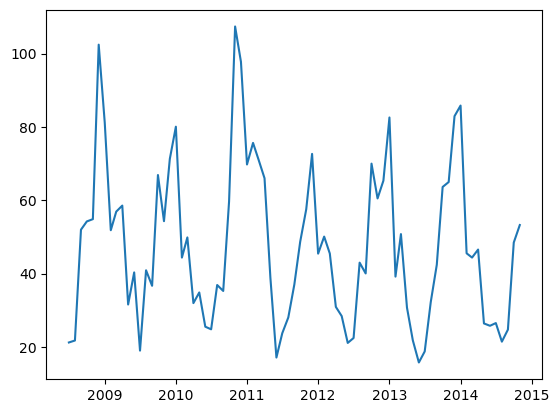

In [203]:
plt.plot(speciesDG['date'], speciesDG['Teflon Mass'])



##### plot linear regrssion and 
#####.  find -? ug/m3 per year (or % change / year)
#####       but PM2.5 change seems to be very seasonal, will linear regression really work?
#####                calculate statistical significance numbers!

.          
let OM/OC = 1.4 to be in constant with existing OM data  
.  


In [61]:

dates = speciesNS['date']
MD = speciesNS['MD']
NH4 = speciesNS['NH4+']
Cl = speciesNS['Cl-']

# # Plot the stacked bars
# plt.bar(dates, MD, label='MD')
# plt.bar(dates, NH4, bottom=MD, label='NH\u2084\u207A')
# plt.bar(dates, Cl, bottom=np.array(MD) + np.array(NH4), label='Cl-')

Text(0, 0.5, 'concentration (ug/m₃)')

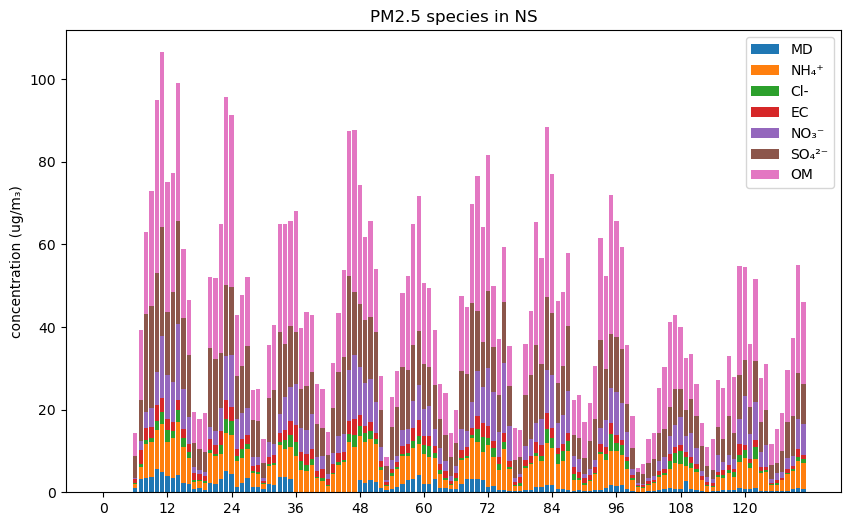

In [62]:
plt.figure(figsize=(10,6))

plt.bar(speciesNS.index, speciesNS['MD'], label='MD')
plt.bar(speciesNS.index, speciesNS['NH4+'], bottom=speciesNS['MD'], label='NH\u2084\u207A')
plt.bar(speciesNS.index, speciesNS['Cl-'],  bottom=speciesNS['MD']+  speciesNS['NH4+'], label='Cl-')
plt.bar(speciesNS.index, speciesNS['EC_TOT'], bottom=speciesNS['MD']+speciesNS['NH4+']+speciesNS['Cl-'], label='EC')
plt.bar(speciesNS.index, speciesNS['NO3-'],  bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+speciesNS['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesNS.index, speciesNS['SO4='],  bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+speciesNS['EC_TOT']+speciesNS['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesNS.index, speciesNS['OM'], bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+ speciesNS['EC_TOT'] + speciesNS['NO3-']+speciesNS['SO4='], label='OM')

plt.xticks(range(0, len(speciesNS.index), 12), speciesNS.index[::12])

plt.title('PM2.5 species in NS')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [63]:
speciesNS['date']

0        0
1        1
2        2
3        3
4        4
      ... 
127    127
128    128
129    129
130    130
131    131
Name: date, Length: 132, dtype: int64

<BarContainer object of 132 artists>

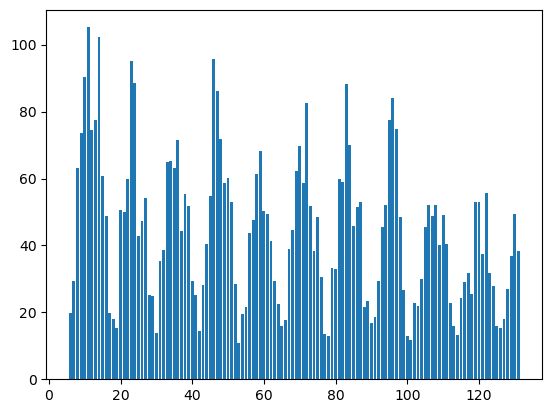

In [64]:
plt.bar(speciesNS['date'], speciesNS['Teflon Mass'])

Text(0, 0.5, 'concentration (ug/m₃)')

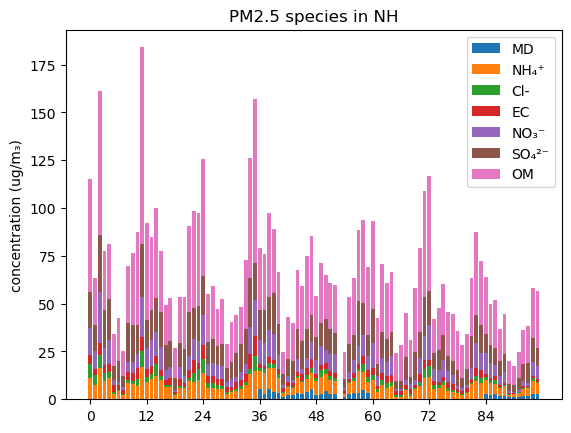

In [65]:
plt.bar(speciesNH.index, speciesNH['MD'], label='MD')
plt.bar(speciesNH.index, speciesNH['NH4+'], bottom=speciesNH['MD'], label='NH\u2084\u207A')
plt.bar(speciesNH.index, speciesNH['Cl-'],  bottom=speciesNH['MD']+  speciesNH['NH4+'], label='Cl-')
plt.bar(speciesNH.index, speciesNH['EC_TOT'], bottom=speciesNH['MD']+speciesNH['NH4+']+speciesNH['Cl-'], label='EC')
plt.bar(speciesNH.index, speciesNH['NO3-'],  bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+speciesNH['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesNH.index, speciesNH['SO4='],  bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+speciesNH['EC_TOT']+speciesNH['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesNH.index, speciesNH['OM'], bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+ speciesNH['EC_TOT'] + speciesNH['NO3-']+speciesNH['SO4='], label='OM')

plt.xticks(range(0, len(speciesNH['date']), 12), speciesNH.index[::12])

plt.title('PM2.5 species in NH')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

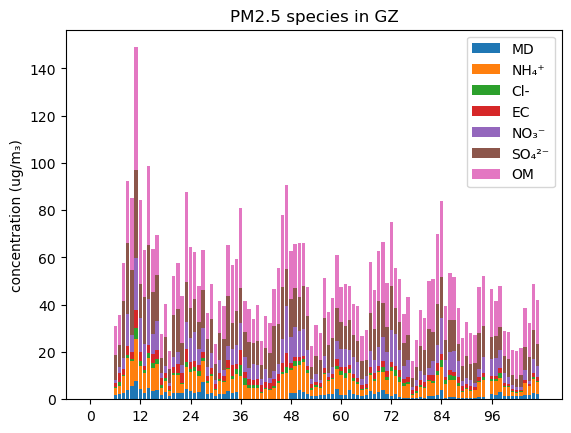

In [66]:
plt.bar(speciesGZ.index, speciesGZ['MD'], label='MD')
plt.bar(speciesGZ.index, speciesGZ['NH4+'], bottom=speciesGZ['MD'], label='NH\u2084\u207A')
plt.bar(speciesGZ.index, speciesGZ['Cl-'], bottom=speciesGZ['MD']+speciesGZ['NH4+'], label='Cl-')
plt.bar(speciesGZ.index, speciesGZ['EC_TOT'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-'], label='EC')
plt.bar(speciesGZ.index, speciesGZ['NO3-'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesGZ.index, speciesGZ['SO4='], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT']+speciesGZ['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesGZ.index, speciesGZ['OM'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT']+speciesGZ['NO3-']+speciesGZ['SO4='], label='OM')

plt.xticks(range(0, len(speciesGZ.index), 12), speciesGZ.index[::12])

plt.title('PM2.5 species in GZ')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

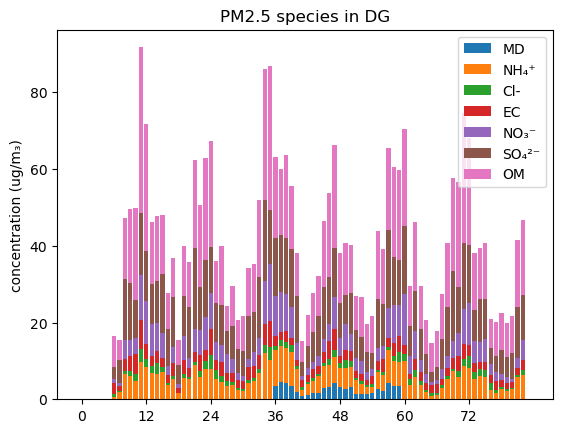

In [67]:
plt.bar(speciesDG.index, speciesDG['MD'], label='MD')
plt.bar(speciesDG.index, speciesDG['NH4+'], bottom=speciesDG['MD'], label='NH\u2084\u207A')
plt.bar(speciesDG.index, speciesDG['Cl-'],  bottom=speciesDG['MD']+  speciesDG['NH4+'], label='Cl-')
plt.bar(speciesDG.index, speciesDG['EC_TOT'], bottom=speciesDG['MD']+speciesDG['NH4+']+speciesDG['Cl-'], label='EC')
plt.bar(speciesDG.index, speciesDG['NO3-'],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesDG.index, speciesDG['SO4='],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT']+speciesDG['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesDG.index, speciesDG['OM'], bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+ speciesDG['EC_TOT'] + speciesDG['NO3-']+speciesDG['SO4='], label='OM')

plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

plt.title('PM2.5 species in DG')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [68]:
DG = speciesDG.dropna(subset=['Teflon Mass'])
GZ = speciesGZ.dropna(subset=['Teflon Mass'])

NameError: name 'lin' is not defined

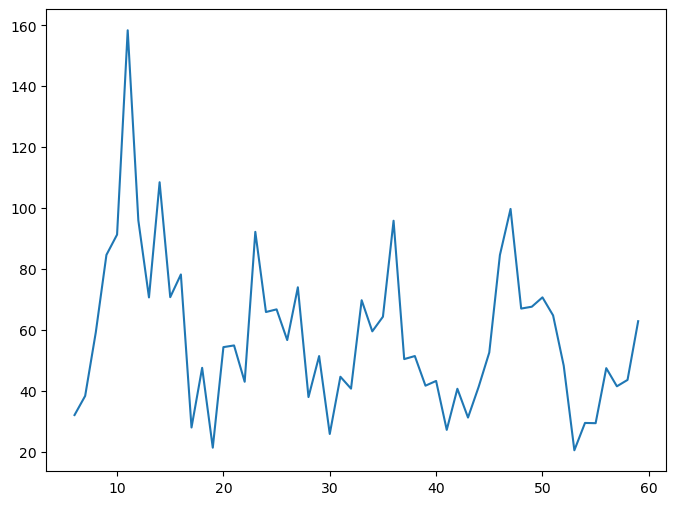

In [69]:
plt.figure(figsize=(8, 6))

# Plot the regression line
plt.plot(GZ['date'],GZ['Teflon Mass'])
plt.plot(GZ['date'], lin, linestyle = '--')

plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.4 for DG')
plt.grid(True)


# Fit a linear regression model
y = range(len(GZ))
X = GZ['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# reslt using linear regression
lin = []
for i in y:
    lin.append(slope*i+intercept)



# # Print the regression equation on the plot
equation = f'y = {slope:.3f}x + {intercept:.2f}'
# plt.text(0.5, 65, equation, color='red')

plt.show()
print(equation)
print('r-squared: ',model.score(X,y))

In [ ]:
len(lin)

In [ ]:
z=[[1],[2],[3]]
type(z)

Text(0, 0.5, 'concentration (ug/m₃)')

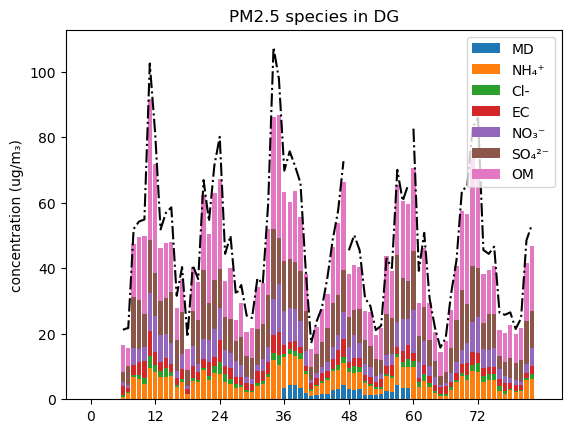

In [76]:
plt.bar(speciesDG.index, speciesDG['MD'], label='MD')
plt.bar(speciesDG.index, speciesDG['NH4+'], bottom=speciesDG['MD'], label='NH\u2084\u207A')
plt.bar(speciesDG.index, speciesDG['Cl-'],  bottom=speciesDG['MD']+  speciesDG['NH4+'], label='Cl-')
plt.bar(speciesDG.index, speciesDG['EC_TOT'], bottom=speciesDG['MD']+speciesDG['NH4+']+speciesDG['Cl-'], label='EC')
plt.bar(speciesDG.index, speciesDG['NO3-'],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesDG.index, speciesDG['SO4='],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT']+speciesDG['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesDG.index, speciesDG['OM'], bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+ speciesDG['EC_TOT'] + speciesDG['NO3-']+speciesDG['SO4='], label='OM')

plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

plt.plot(speciesDG['Teflon Mass'], linestyle='dashdot',color='black')
plt.plot(speciesDG['T Mass'],linestyle='dashdot',color='black')

plt.title('PM2.5 species in DG')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [77]:
unaccountedGZ = []

for i in range(len(speciesGZ)):
    unaccountedGZ.append((speciesGZ['Teflon Mass'][i]-speciesGZ['species'][i])/speciesGZ['Teflon Mass'][i])

In [78]:
unaccountedNH = []

for i in range(len(speciesNH)):
    unaccountedNH.append((speciesNH['Teflon Mass'][i]-speciesNH['species'][i])/speciesNH['Teflon Mass'][i])

unaccountedNS = []

for i in range(len(speciesNS)):
    unaccountedNS.append((speciesNS['Teflon Mass'][i]-speciesNS['species'][i])/speciesNS['Teflon Mass'][i])

unaccountedDG = []

for i in range(len(speciesDG)):
    unaccountedDG.append((speciesDG['Teflon Mass'][i]-speciesDG['species'][i])/speciesDG['Teflon Mass'][i])

In [79]:
print(np.nanmax(unaccountedGZ), max(unaccountedNH), np.nanmax(unaccountedNS), np.nanmax(unaccountedDG))

0.2539118704946639 0.25386914856263576 0.5371301652017013 0.2853056568597667


In [80]:
print(np.nanmin(unaccountedGZ), min(unaccountedNH), np.nanmin(unaccountedNS), np.nanmin(unaccountedDG))

-0.13043834845768373 -0.24128781368004365 -0.3566453246090887 -0.001947887275476761


In [81]:
print(np.nanmean(unaccountedGZ), np.nanmean(unaccountedNH), np.nanmean(unaccountedNS), np.nanmean(unaccountedDG))

0.05411990880707998 -0.07018307577967263 0.015665268086021276 0.12140709964869742


In [82]:
for i in range(len(speciesNS)):
    if pd.isnull(speciesNS['Teflon Mass'][i]):
        speciesNS.loc[i, 'Teflon Mass'] = speciesNS['PM2.5'][i] 

In [83]:
for i in range(len(speciesGZ)):
    if pd.isnull(speciesGZ['Teflon Mass'][i]):
        speciesGZ.loc[i, 'Teflon Mass'] = speciesGZ['PM2.5'][i] 

In [84]:
unNH= []
for i in range(len(speciesNH)):
    unNH.append((speciesNH['species'][i])/speciesNH['Teflon Mass'][i])

In [85]:
import numpy as np
from tabulate import tabulate



# Calculate max, min, and mean values while omitting NaN
data = [
    ["Max", np.nanmax(unaccountedGZ), max(unaccountedNH), np.nanmax(unaccountedNS), np.nanmax(unaccountedDG)],
    ["Min", np.nanmin(unaccountedGZ), min(unaccountedNH), np.nanmin(unaccountedNS), np.nanmin(unaccountedDG)],
    ["Mean", np.nanmean(unaccountedGZ), np.nanmean(unaccountedNH), np.nanmean(unaccountedNS), np.nanmean(unaccountedDG)]
]

# Print the results in a table
headers = ["Stat", "unaccountedGZ", "unaccountedNH", "unaccountedNS", "unaccountedDG"]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------+-----------------+-----------------+-----------------+-----------------+
| Stat   |   unaccountedGZ |   unaccountedNH |   unaccountedNS |   unaccountedDG |
+========+=================+=================+=================+=================+
| Max    |       0.253912  |       0.253869  |       0.53713   |      0.285306   |
+--------+-----------------+-----------------+-----------------+-----------------+
| Min    |      -0.130438  |      -0.241288  |      -0.356645  |     -0.00194789 |
+--------+-----------------+-----------------+-----------------+-----------------+
| Mean   |       0.0541199 |      -0.0701831 |       0.0156653 |      0.121407   |
+--------+-----------------+-----------------+-----------------+-----------------+


In [86]:
max_index = np.nanargmax(unaccountedNS)
max_index

100

In [87]:
#speciesNS.iloc[100]

In [88]:
min(unNH)

0.7461308514373642

In [89]:
#speciesDG

In [90]:
str(speciesDG['date'][5])[5:8]

'05-'

### select summer  
June, July, August

In [206]:
rows = []

for i in range(len(speciesDG)):
    if str(speciesDG['date'][i])[5:7] == '06' :#or '07' or '08':
        #print(i)
        rows.append(speciesDG.iloc[i])
    if str(speciesDG['date'][i])[5:7] == '07' :
        rows.append(speciesDG.iloc[i])
    if str(speciesDG['date'][i])[5:7] == '08' :
        rows.append(speciesDG.iloc[i])

jjaDG = pd.DataFrame(rows)  
    

In [207]:
rows = []

for i in range(len(speciesGZ)):
    if str(speciesGZ['date'][i])[5:7] == '06' :#or '07' or '08':
        #print(i)
        rows.append(speciesGZ.iloc[i])
    if str(speciesGZ['date'][i])[5:7] == '07' :
        rows.append(speciesGZ.iloc[i])
    if str(speciesGZ['date'][i])[5:7] == '08' :
        rows.append(speciesGZ.iloc[i])

jjaGZ = pd.DataFrame(rows)  

In [208]:
rows = []

for i in range(len(speciesNH)):
    if str(speciesNH['date'][i])[5:7] == '06' :#or '07' or '08':
        #print(i)
        rows.append(speciesNH.iloc[i])
    if str(speciesNH['date'][i])[5:7] == '07' :
        rows.append(speciesNH.iloc[i])
    if str(speciesNH['date'][i])[5:7] == '08' :
        rows.append(speciesNH.iloc[i])

jjaNH = pd.DataFrame(rows)  

In [209]:
#rows

In [210]:
rows = []

for i in range(len(speciesNS)):
    if str(speciesNS['date'][i])[5:7] == '06' :#or '07' or '08':
        #print(i)
        rows.append(speciesNS.iloc[i])
    if str(speciesNS['date'][i])[5:7] == '07' :
        rows.append(speciesNS.iloc[i])
    if str(speciesNS['date'][i])[5:7] == '08' :
        rows.append(speciesNS.iloc[i])

jjaNS = pd.DataFrame(rows)  

In [211]:
jjaNS.head()

,Unnamed: 0,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,...,Ca,OM,Al,Si,Mn,Fe,PM2.5,S/SO4,MD,species
5,5,2007-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
6,6,2007-07-01,19.752231,1.019431,0.069693,0.184391,0.410164,5.143569,3.158220,1.012952,...,NaN,5.684796,NaN,NaN,NaN,NaN,NaN,NaN,0.938041,14.393345
7,7,2007-08-01,29.368743,2.864670,0.348800,0.767722,2.136580,9.962224,9.381158,3.255864,...,NaN,16.886084,NaN,NaN,NaN,NaN,NaN,NaN,3.313031,39.186175
17,17,2008-06-01,19.710198,1.767531,0.279694,0.457109,1.570450,5.753661,4.114474,1.628738,...,NaN,7.406054,NaN,NaN,NaN,NaN,NaN,NaN,0.780703,19.364245
18,18,2008-07-01,17.915419,1.705838,0.255672,0.325493,1.070867,4.893618,4.097923,1.443789,...,NaN,7.376261,NaN,NaN,NaN,NaN,NaN,NaN,0.954751,17.770618


In [212]:
jjaDG=jjaDG.fillna(0)
jjaGZ=jjaGZ.fillna(0)
jjaNH=jjaNH.fillna(0)
jjaNS=jjaNS.fillna(0)

jjaGZ = jjaGZ.iloc[1:]
jjaNS = jjaNS.iloc[1:]
jjaDG = jjaDG.iloc[5:]

In [213]:
mask = ~np.isnan(jjaDG['Teflon Mass'])
#mask

DG JJA
-0.43027237871934876 *x +  29.734728952737946
0.3407941480648041


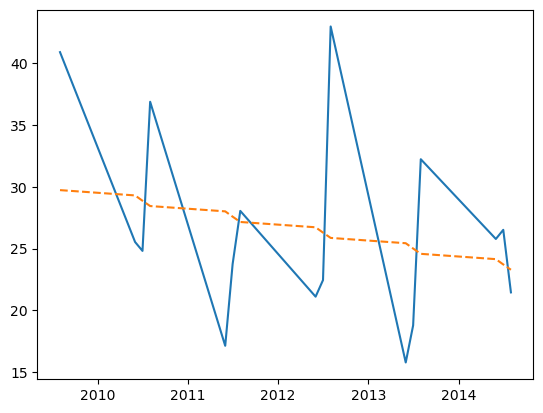

In [214]:
# Fit a linear regression model
from scipy import stats



y = range(len(jjaDG))
slope, intercept, r_value, p_value, std_err = stats.linregress(y,jjaDG['Teflon Mass'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slope*i+intercept)


plt.show()
print('DG JJA')
print(slope,'*x + ',intercept)
print(p_value)

plt.plot(jjaDG['date'], jjaDG['Teflon Mass'])
plt.plot(jjaDG['date'], lin, linestyle= '--')


GZ JJA
-0.7118008813049115 *x +  35.80352491737798
0.044551331513422616


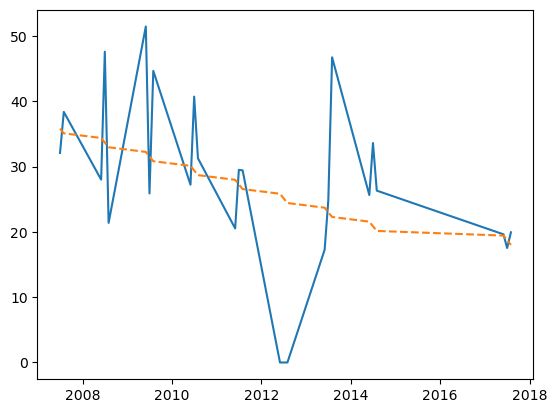

In [186]:
# Fit a linear regression model
from scipy import stats

y = range(len(jjaGZ))
slope, intercept, r_value, p_value, std_err = stats.linregress(y,jjaGZ['Teflon Mass'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slope*i+intercept)


plt.show()
print('GZ JJA')
print(slope,'*x + ',intercept)
print(p_value)

plt.plot(jjaGZ['date'], jjaGZ['Teflon Mass'])
plt.plot(jjaGZ['date'], lin, linestyle= '--')

In [157]:
jjaNH.head()

,Unnamed: 0,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,...,Manganese,Iron,Al,Si,Mn,Fe,PM2.5,Na,MD,species
5,5,2008-06-01,33.757469,2.872191,0.529176,1.148237,2.392980,7.543302,7.921823,3.610962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.203501
6,6,2008-07-01,43.759903,4.145138,0.717666,0.758632,1.971329,10.838670,10.755768,2.407728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.708608
7,7,2008-08-01,26.266032,2.289173,0.384282,0.723113,1.294876,6.165351,6.070011,1.913133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.132670
17,17,2009-06-01,52.794046,6.337717,0.810515,1.276796,5.690306,13.930736,10.728184,3.350395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.115135
18,18,2009-07-01,27.467360,2.124264,0.291606,0.550228,1.437618,6.285519,7.427783,0.932071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.928044


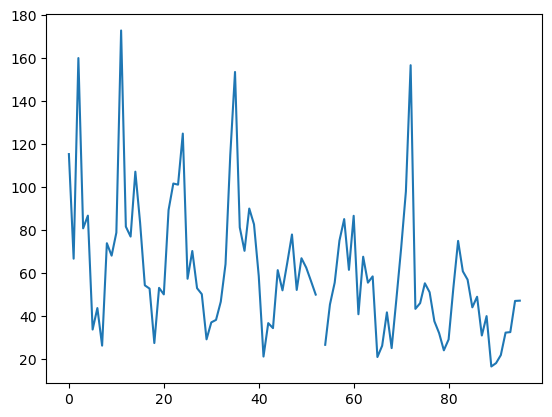

In [123]:
plt.plot(speciesNH['Teflon Mass'])

NS JJA
-0.02695892921171462 *x +  19.994264891784567
0.8515055449526625


Text(0.5, 1.0, 'NS summer')

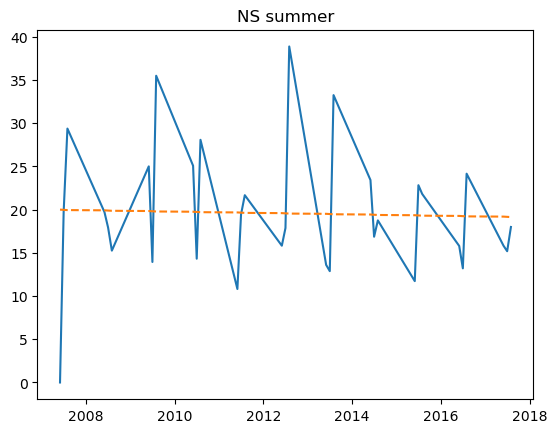

In [155]:
from scipy import stats

y = range(len(jjaNS))
slope, intercept, r_value, p_value, std_err = stats.linregress(y,jjaNS['Teflon Mass'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slope*i+intercept)


plt.show()
print('NS JJA')
print(slope,'*x + ',intercept)
print(p_value)

plt.plot(jjaNS['date'], jjaNS['Teflon Mass'])
plt.plot(jjaNS['date'], lin, linestyle= '--')
plt.title('NS summer')

In [119]:
a = np.array([36.74579381])
a

array([36.74579381])

In [150]:
from scipy import stats

y = range(len(jjaNH))
slope, intercept, r_value, p_value, std_err = stats.linregress(y,jjaNH['Teflon Mass'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slope*i+intercept)


plt.show()
print('NH JJA')
print(slope,'*x + ',intercept)
print(p_value)

NH JJA
-0.7043289922335777 *x +  40.03531971220032
0.018190390366439428


####  For Decemner, Janauary, Feburary

In [102]:
rows = []

for i in range(len(speciesGZ)):
    if str(speciesGZ['date'][i])[5:7] == '12' :#or '07' or '08':
        #print(i)
        rows.append(speciesGZ.iloc[i])
    if str(speciesGZ['date'][i])[5:7] == '01' :
        rows.append(speciesGZ.iloc[i])
    if str(speciesGZ['date'][i])[5:7] == '02' :
        rows.append(speciesGZ.iloc[i])

djfGZ = pd.DataFrame(rows) 

In [103]:
rows = []

for i in range(len(speciesDG)):
    if str(speciesDG['date'][i])[5:7] == '12' :#or '07' or '08':
        #print(i)
        rows.append(speciesDG.iloc[i])
    if str(speciesDG['date'][i])[5:7] == '01' :
        rows.append(speciesDG.iloc[i])
    if str(speciesDG['date'][i])[5:7] == '02' :
        rows.append(speciesDG.iloc[i])

djfDG = pd.DataFrame(rows) 

In [104]:
rows = []

for i in range(len(speciesNH)):
    if str(speciesNH['date'][i])[5:7] == '12' :#or '07' or '08':
        #print(i)
        rows.append(speciesNH.iloc[i])
    if str(speciesNH['date'][i])[5:7] == '01' :
        rows.append(speciesNH.iloc[i])
    if str(speciesNH['date'][i])[5:7] == '02' :
        rows.append(speciesNH.iloc[i])

djfNH = pd.DataFrame(rows) 

In [105]:
rows = []

for i in range(len(speciesNS)):
    if str(speciesNS['date'][i])[5:7] == '12' :#or '07' or '08':
        #print(i)
        rows.append(speciesNS.iloc[i])
    if str(speciesNS['date'][i])[5:7] == '01' :
        rows.append(speciesNS.iloc[i])
    if str(speciesNS['date'][i])[5:7] == '02' :
        rows.append(speciesNS.iloc[i])

djfNS = pd.DataFrame(rows) 

In [106]:
djfGZ = djfGZ.fillna(0)
djfDG = djfDG.fillna(0)
djfNH = djfNH.fillna(0)
djfNS = djfNS.fillna(0)

djfGZ = djfGZ.iloc[2:]
djfDG = djfDG.iloc[2:]
djfNH = djfNH.iloc[2:]
djfNS = djfNS.iloc[2:]

In [149]:
from scipy import stats

y = range(len(djfGZ))
slope, intercept, r_value, p_value, std_err = stats.linregress(y,djfGZ['Teflon Mass'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slope*i+intercept)


plt.show()
print('GZ DJF')
print(slope,'*x + ',intercept)
print(p_value)

GZ DJF
-2.7592746505387304 *x +  94.62151774968262
0.004167540116419504


In [148]:
from scipy import stats

y = range(len(djfDG))
slope, intercept, r_value, p_value, std_err = stats.linregress(y,djfDG['Teflon Mass'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slope*i+intercept)


plt.show()
print('DG DJF')
print(slope,'*x + ',intercept)
print(p_value)

DG DJF
-0.9041761822846224 *x +  52.50776541986076
0.3937532753810866


NH DJF
-2.825222173528915 *x +  112.1089508624753
0.023817856143408013


Text(0.5, 1.0, 'NH winter')

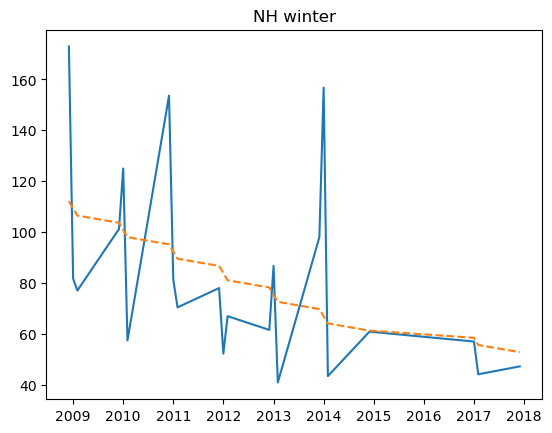

In [147]:
from scipy import stats

y = range(len(djfNH))
slope, intercept, r_value, p_value, std_err = stats.linregress(y,djfNH['Teflon Mass'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slope*i+intercept)


plt.show()
print('NH DJF')
print(slope,'*x + ',intercept)
print(p_value)

# plt.plot(djfNS['date'], djfNS['Teflon Mass'])
plt.plot(djfNH['date'], djfNH['Teflon Mass'])
plt.plot(djfNH['date'], lin, linestyle = '--')
plt.title('NH winter')

NS DJF
-1.0683059603187663 *x +  80.63510905105909
0.0022883269107042254


Text(0.5, 1.0, 'NS winter')

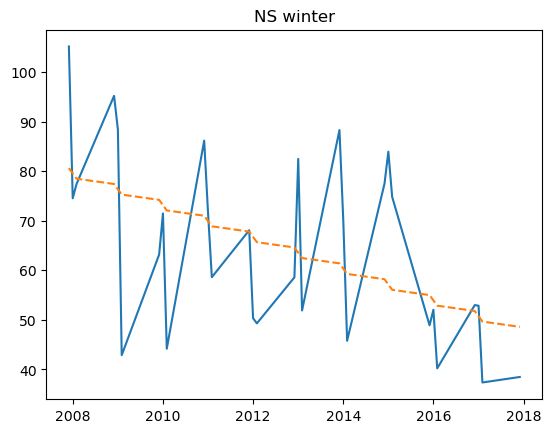

In [145]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(y,djfNS['Teflon Mass'])


# reslt using linear regression
lin = []
for i in range(len(djfNS)):
    lin.append(slope*i+intercept)


plt.show()
print('NS DJF')
print(slope,'*x + ',intercept)
print(p_value)

# plt.plot(djfNS['date'], djfNS['Teflon Mass'])
plt.plot(djfNS['date'], djfNS['Teflon Mass'])
plt.plot(djfNS['date'], lin, linestyle = '--')
plt.title('NS winter')

In [111]:
# Calculate max, min, and mean values while omitting NaN
data = [
    ["JJA", -0.128, -0.041, -0.243, -0.043],
    ["DJF", -0.052, -0.014, -0.085, -0.036],
    
]

# Print the results in a table
headers = ["linRegress", "GZ", "DG", "NH", "NS"]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------+--------+--------+--------+--------+
| linRegress   |     GZ |     DG |     NH |     NS |
+==============+========+========+========+========+
| JJA          | -0.128 | -0.041 | -0.243 | -0.043 |
+--------------+--------+--------+--------+--------+
| DJF          | -0.052 | -0.014 | -0.085 | -0.036 |
+--------------+--------+--------+--------+--------+


calculate the average for JJA and DJF  
calcualte the annual average, then calculate linear regression

In [215]:
jjaNH.to_excel('jjaNH.xlsx',index=True)
jjaGZ.to_excel('jjaGZ.xlsx',index=True)
jjaDG.to_excel('jjaDG.xlsx',index=True)
jjaNS.to_excel('jjaNS.xlsx',index=True)

djfGZ.to_excel('djfGZ.xlsx',index=True)
djfNH.to_excel('djfNH.xlsx',index=True)
djfNS.to_excel('djfNS.xlsx',index=True)
djfDG.to_excel('djfDG.xlsx',index=True)